In [1]:
import numpy as np
import pandas as pd
import pandas.util.testing as tm
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\Deepti Shukla\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  This is separate from the ipykernel package so we can avoid doing imports until

Bad key "text.kerning_factor" on line 4 in
C:\Users\Deepti Shukla\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
df1 = pd.read_excel('sales-pipeline.xlsx', index= True )
df1

,Account,Opportunity_ID,Sales_Agent,SalesAgentEmailID,ContactEmailID,Deal_Stage,Product,Close_Value,Created Date,Close Date,DateDiff
0,Konex,3KR50X38,Corliss Cosme,corliss@piedpiper.com,delila@konex.com,Won,GTX Plus Basic,1255,2016-01-04,2016-05-24,141
1,Finjob,YFS5KLJJ,Rosalina Dieter,rosalina@piedpiper.com,belinda@finjob.com,Won,MG Special,45,2016-01-04,2016-11-02,303
2,Kinnamplus,N0ONCYVZ,Donn Cantrell,donn@piedpiper.com,monte@kinnamplus.com,Lost,MG Special,1054,2016-01-06,2016-12-07,336
3,Genco Pura Olive Oil Company,IBEUTCSW,James Ascencio,james@piedpiper.com,karole@gencopuraoliveoilcompany.com,In Progress,MG Advanced,1054,2016-01-06,2016-09-11,249
4,Initech,G8AO5FA2,Wilburn Farren,wilburn@piedpiper.com,alejandro@initech.com,Lost,MG Advanced,517,2016-01-06,2016-09-18,256
...,...,...,...,...,...,...,...,...,...,...,...
8795,Vehement Capital Partners,2BD1SDBX,Jonathan Berthelot,jonathan@piedpiper.com,lavonia@vehementcapitalpartners.com,In Progress,GTX Basic,590,2018-12-30,2019-07-22,204
8796,Hottechi,F1NWH30L,Marty Freudenburg,marty@piedpiper.com,juliette@hottechi.com,In Progress,MG Advanced,3284,2018-12-30,2019-05-26,147
8797,Umbrella Corporation,6KHIXTAD,Anna Snelling,anna@piedpiper.com,orpha@umbrellacorporation.com,In Progress,GTX Plus Pro,300,2018-12-31,2019-04-15,105
8798,Rundofase,BUOI3TBI,Gladys Colclough,gladys@piedpiper.com,crista@rundofase.com,In Progress,MG Special,3284,2018-12-31,2019-05-16,136


In [5]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316776 entries, 0 to 316775
Data columns (total 6 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   interactionID                    316776 non-null  int64         
 1   fromEmailId                      316776 non-null  object        
 2   toEmailId                        316776 non-null  object        
 3   InteractionDate                  316776 non-null  datetime64[ns]
 4   InteractionType(Call/Email/SMS)  316776 non-null  object        
 5   Extracted Interaction Text       316776 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 14.5+ MB


In [6]:
# for i in df2["fromEmailId"]:
#     for j in df2["toEMailId"]:
#         if i==j :
#             df2.drop(df[i])
df2.drop(df2[df2["fromEmailId"]==df2["toEmailId"]].index,inplace=True)


In [7]:
df2.reset_index(drop=True,inplace=True)

In [9]:
df2

,interactionID,fromEmailId,toEmailId,InteractionDate,InteractionType(Call/Email/SMS),Extracted Interaction Text,deal
0,8842411,gladys@piedpiper.com,kristle@dontechi.com,2016-01-04,Call,I thoroughly enjoyed your presentation yesterd...,1
1,8015509,donn@piedpiper.com,orpha@umbrellacorporation.com,2016-01-04,Call,speaking with you and your staff will be a tre...,1
2,5976842,kary@piedpiper.com,claribel@goodsilron.com,2016-01-04,Email,"However, I am unable to join because of my fam...",0
3,1471794,boris@piedpiper.com,gordon@scotfind.com,2016-01-04,Call,We are extremely sorry to inform you that we h...,0
4,4330320,darcel@piedpiper.com,benny@treequote.com,2016-01-04,Call,I don't think it's possible for me to meet you,0
...,...,...,...,...,...,...,...
158383,5032312,marty@piedpiper.com,crista@rundofase.com,2019-08-01,Email,I hope you have all had a chance to look at ou...,1
158384,2256384,corliss@piedpiper.com,natisha@groovestreet.com,2019-08-01,Call,"We found your bid well-prepared, but considera...",1
158385,4533243,james@piedpiper.com,orpha@umbrellacorporation.com,2019-08-01,Email,"We found your bid well-prepared, but considera...",1
158386,7555666,daniell@piedpiper.com,justine@codehow.com,2019-08-01,Email,I want to compliment you on getting the sales ...,1


In [4]:
 df2 = pd.read_excel('interactions.xlsx', index= True)
df2

,interactionID,fromEmailId,toEmailId,InteractionDate,InteractionType(Call/Email/SMS),Extracted Interaction Text
0,8842411,gladys@piedpiper.com,kristle@dontechi.com,2016-01-04,Call,I thoroughly enjoyed your presentation yesterd...
1,8015509,donn@piedpiper.com,orpha@umbrellacorporation.com,2016-01-04,Call,speaking with you and your staff will be a tre...
2,5976842,kary@piedpiper.com,claribel@goodsilron.com,2016-01-04,Email,"However, I am unable to join because of my fam..."
3,1471794,boris@piedpiper.com,gordon@scotfind.com,2016-01-04,Call,We are extremely sorry to inform you that we h...
4,4330320,darcel@piedpiper.com,benny@treequote.com,2016-01-04,Call,I don't think it's possible for me to meet you
...,...,...,...,...,...,...
316771,4113251,jonathan@piedpiper.com,jonathan@piedpiper.com,2019-08-01,Call,I hope you have all had a chance to look at ou...
316772,1017954,darcel@piedpiper.com,darcel@piedpiper.com,2019-08-01,Call,I'm not convinced with the progress of the pro...
316773,1776707,rosalina@piedpiper.com,rosalina@piedpiper.com,2019-08-01,Call,After spending nearly five years consulting fo...
316774,9400643,lajuana@piedpiper.com,lajuana@piedpiper.com,2019-08-01,Call,We appreciate your interest in Doe's English L...


In [8]:
sentiment=[]

from textblob import TextBlob
for i in df2["Extracted Interaction Text"]:
    if TextBlob(i).sentiment.polarity>0:
        sentiment.append(1)
    else:
        sentiment.append(0)
df2=df2.assign(deal=sentiment)

In [10]:
list1=df2.loc[1:10,'Extracted Interaction Text']

In [11]:
for i in list1:
    print(i)
    print("***********************")

speaking with you and your staff will be a tremendous opportunity for me to present our product line. i sincerely thank you for extending this offer and expect to meet with you, as requested in your invitation, on friday, may 9, at 3:00 p.m. in your conference room.
***********************
However, I am unable to join because of my family obligations. I'm not sure I can handle another commitment in addition to raising my young children. 
***********************
We are extremely sorry to inform you that we have decided to accept a competitor's bid instead of the one you submitted. 
***********************
I don't think it's possible for me to meet you
***********************
I have'nt heard from you regarding the status of the project. If you don't send me any report by tomorrow, I will be forced to cancel our deal
***********************
I am very pleased to accept your invitation to meet with your marketing team. We have much to discuss. See you then.
***********************
Congratul

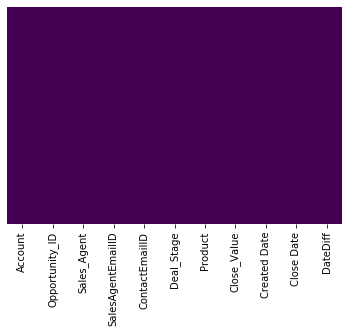

In [12]:
sns.heatmap(df1.isnull(),yticklabels=False,cbar=False,cmap='viridis')

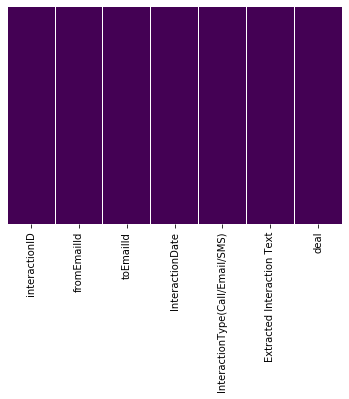

In [13]:
sns.heatmap(df2.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [14]:
df2

,interactionID,fromEmailId,toEmailId,InteractionDate,InteractionType(Call/Email/SMS),Extracted Interaction Text,deal
0,8842411,gladys@piedpiper.com,kristle@dontechi.com,2016-01-04,Call,I thoroughly enjoyed your presentation yesterd...,1
1,8015509,donn@piedpiper.com,orpha@umbrellacorporation.com,2016-01-04,Call,speaking with you and your staff will be a tre...,1
2,5976842,kary@piedpiper.com,claribel@goodsilron.com,2016-01-04,Email,"However, I am unable to join because of my fam...",0
3,1471794,boris@piedpiper.com,gordon@scotfind.com,2016-01-04,Call,We are extremely sorry to inform you that we h...,0
4,4330320,darcel@piedpiper.com,benny@treequote.com,2016-01-04,Call,I don't think it's possible for me to meet you,0
...,...,...,...,...,...,...,...
158383,5032312,marty@piedpiper.com,crista@rundofase.com,2019-08-01,Email,I hope you have all had a chance to look at ou...,1
158384,2256384,corliss@piedpiper.com,natisha@groovestreet.com,2019-08-01,Call,"We found your bid well-prepared, but considera...",1
158385,4533243,james@piedpiper.com,orpha@umbrellacorporation.com,2019-08-01,Email,"We found your bid well-prepared, but considera...",1
158386,7555666,daniell@piedpiper.com,justine@codehow.com,2019-08-01,Email,I want to compliment you on getting the sales ...,1


In [ ]:
for i in df2[]:

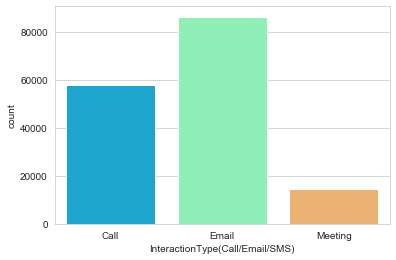

In [15]:
plt.figure(figsize=(6, 4))
sns.set_style('whitegrid')
sns.countplot(x='InteractionType(Call/Email/SMS)',data=df2,palette='rainbow')

In [16]:
df1.corr(method ='pearson')

,Close_Value,DateDiff
Close_Value,1.000000,0.018414
DateDiff,0.018414,1.000000


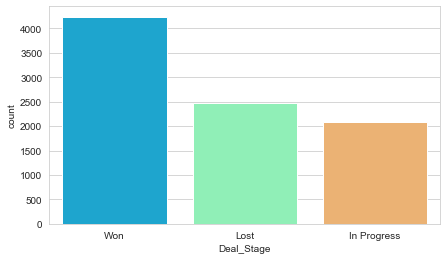

In [17]:
plt.figure(figsize=(7, 4))
sns.set_style('whitegrid')
sns.countplot(x='Deal_Stage',data=df1,palette='rainbow')

In [18]:
money_spent=df1.groupby(by=['Sales_Agent'], as_index=False)['Close_Value'].sum() 
mydata=money_spent.sort_values(by='Close_Value', ascending=False)
#shows that location 18 has maximum sales and top 5 maximum sales areas
mydata
# money_spent=df_new.groupby(by=['LOCATION CODE'], as_index=False)['INVOICED AMOUNT '].sum()
# mydata=money_spent.sort_values(by='INVOICED AMOUNT ', ascending=False)
# #shows that location 18 has maximum sales and top 5 maximum sales areas
# mydata

,Sales_Agent,Close_Value
6,Darcel Schlecht,1702167
26,Vicki Laflamme,802633
15,Kary Hendrixson,795273
29,Zane Levy,711304
2,Cassey Cress,682681
4,Corliss Cosme,652726
7,Donn Cantrell,622226
10,Gladys Colclough,615436
12,James Ascencio,615218
0,Anna Snelling,593865


In [19]:
elt_loss=[]
elt_loss=df1[df1['Deal_Stage']=="Lost"].index




In [20]:
elt_loss

Int64Index([   2,    4,   18,   25,   26,   27,   30,   32,   38,   48,
            ...
            8265, 8266, 8269, 8274, 8277, 8278, 8280, 8287, 8296, 8297],
           dtype='int64', length=2473)

In [21]:
len(elt_loss)

2473

In [22]:
df1.drop(df1.index[elt_loss],inplace =True)


In [23]:
df1.reset_index(drop=True,inplace=True)
df1

,Account,Opportunity_ID,Sales_Agent,SalesAgentEmailID,ContactEmailID,Deal_Stage,Product,Close_Value,Created Date,Close Date,DateDiff
0,Konex,3KR50X38,Corliss Cosme,corliss@piedpiper.com,delila@konex.com,Won,GTX Plus Basic,1255,2016-01-04,2016-05-24,141
1,Finjob,YFS5KLJJ,Rosalina Dieter,rosalina@piedpiper.com,belinda@finjob.com,Won,MG Special,45,2016-01-04,2016-11-02,303
2,Genco Pura Olive Oil Company,IBEUTCSW,James Ascencio,james@piedpiper.com,karole@gencopuraoliveoilcompany.com,In Progress,MG Advanced,1054,2016-01-06,2016-09-11,249
3,Stanredtax,2V848WZD,Lajuana Vencill,lajuana@piedpiper.com,candice@stanredtax.com,Won,MG Advanced,3180,2016-01-07,2016-01-31,24
4,Hatfan,PE84CX4O,Zane Levy,zane@piedpiper.com,tyron@hatfan.com,Won,GTX Basic,517,2016-01-08,2016-12-08,335
...,...,...,...,...,...,...,...,...,...,...,...
6322,Vehement Capital Partners,2BD1SDBX,Jonathan Berthelot,jonathan@piedpiper.com,lavonia@vehementcapitalpartners.com,In Progress,GTX Basic,590,2018-12-30,2019-07-22,204
6323,Hottechi,F1NWH30L,Marty Freudenburg,marty@piedpiper.com,juliette@hottechi.com,In Progress,MG Advanced,3284,2018-12-30,2019-05-26,147
6324,Umbrella Corporation,6KHIXTAD,Anna Snelling,anna@piedpiper.com,orpha@umbrellacorporation.com,In Progress,GTX Plus Pro,300,2018-12-31,2019-04-15,105
6325,Rundofase,BUOI3TBI,Gladys Colclough,gladys@piedpiper.com,crista@rundofase.com,In Progress,MG Special,3284,2018-12-31,2019-05-16,136


In [24]:
elt_inprogress=[]
elt_inprogress=df1[df1['Deal_Stage']=="In Progress"].index

In [25]:
len(elt_inprogress)


2089

In [26]:
elt_inprogress

Int64Index([   2,   13,   27,   30,   33,   35,   36,   39,   40,   44,
            ...
            6317, 6318, 6319, 6320, 6321, 6322, 6323, 6324, 6325, 6326],
           dtype='int64', length=2089)

In [27]:
len(df2['toEmailId'].unique())

85

In [28]:
len(df1['ContactEmailID'].unique())

85

In [29]:
df1.describe()

,Close_Value,DateDiff
count,6327.000000,6327.000000
mean,2041.180338,312.910384
std,2313.436221,238.227850
min,38.000000,0.000000
25%,493.000000,119.000000
50%,1022.000000,247.000000
75%,3750.500000,481.000000
max,30288.000000,958.000000


In [30]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158388 entries, 0 to 158387
Data columns (total 7 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   interactionID                    158388 non-null  int64         
 1   fromEmailId                      158388 non-null  object        
 2   toEmailId                        158388 non-null  object        
 3   InteractionDate                  158388 non-null  datetime64[ns]
 4   InteractionType(Call/Email/SMS)  158388 non-null  object        
 5   Extracted Interaction Text       158388 non-null  object        
 6   deal                             158388 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 8.5+ MB


In [31]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6327 entries, 0 to 6326
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Account            6327 non-null   object        
 1   Opportunity_ID     6327 non-null   object        
 2   Sales_Agent        6327 non-null   object        
 3   SalesAgentEmailID  6327 non-null   object        
 4   ContactEmailID     6327 non-null   object        
 5   Deal_Stage         6327 non-null   object        
 6   Product            6327 non-null   object        
 7   Close_Value        6327 non-null   int64         
 8   Created Date       6327 non-null   datetime64[ns]
 9   Close Date         6327 non-null   datetime64[ns]
 10  DateDiff           6327 non-null   int64         
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 543.9+ KB


In [32]:
count=0
val1=[]
val2=[]
for i in elt_inprogress:
    val1.append(df1.loc[i,'SalesAgentEmailID'])
    val2.append(df1.loc[i,'ContactEmailID'])
print(val1)
print("******************************************************")

print(val2)
#     if df2['toEmailId ']==val:
#         count=count + df1['deal'].val
# print(count)      
#len(val)

['james@piedpiper.com', 'daniell@piedpiper.com', 'markita@piedpiper.com', 'kary@piedpiper.com', 'cassey@piedpiper.com', 'cassey@piedpiper.com', 'kary@piedpiper.com', 'vicki@piedpiper.com', 'maureen@piedpiper.com', 'cassey@piedpiper.com', 'markita@piedpiper.com', 'kami@piedpiper.com', 'daniell@piedpiper.com', 'corliss@piedpiper.com', 'elease@piedpiper.com', 'corliss@piedpiper.com', 'elease@piedpiper.com', 'daniell@piedpiper.com', 'rosalina@piedpiper.com', 'cassey@piedpiper.com', 'hayden@piedpiper.com', 'elease@piedpiper.com', 'kami@piedpiper.com', 'daniell@piedpiper.com', 'kami@piedpiper.com', 'daniell@piedpiper.com', 'cassey@piedpiper.com', 'maureen@piedpiper.com', 'boris@piedpiper.com', 'kami@piedpiper.com', 'maureen@piedpiper.com', 'cassey@piedpiper.com', 'corliss@piedpiper.com', 'kami@piedpiper.com', 'kary@piedpiper.com', 'zane@piedpiper.com', 'kami@piedpiper.com', 'hayden@piedpiper.com', 'rosalina@piedpiper.com', 'james@piedpiper.com', 'vicki@piedpiper.com', 'kary@piedpiper.com', '

In [33]:
len(val2)

2089

In [34]:
# for i in val:
#     if i==df2.loc[0:'toEmailId'] :
#         print(df2.loc['toEmailId'].index)
mylist=[]
count=0
general=0
for i in range (0,len(val1)):
#     if df2['fromEmailId']==val1[i] and df2['toEmailId']==val2[i] :
#         mylist.append(df2[df2['toEmailId']==val[i]].index)
#         count=count+ (df2[i,'deal']).value
#         general=general+1
#     else:
#         pass
    mylist.append(df2[df2['fromEmailId']==val1[i]].index)
#print(mylist)

In [35]:
len(mylist)

2089

In [36]:
mylist2=[]
for i in range (0,len(val2)):
    mylist2.append(df2[df2['toEmailId']==val2[i]].index)
    

In [37]:
matched=[]
for i in range(0,2089):
    a=mylist[i][:]
    b=mylist2[i][:]
    c= set(a) & set(b)
    matched.append(list(c))
    

In [38]:
len(matched[55][:])

40

In [39]:
deal_updated=[]
for i in range(0,2089):
    posdeal=0
    totaldeal=0
    for j in matched[i][:] :
        l=df2.loc[j,'deal']
        posdeal=l+posdeal
        totaldeal=totaldeal+1
        negdeal=totaldeal-posdeal
        if (posdeal>negdeal):
            final_deal_stage="Won"
        else:
            final_deal_stage="Lost"
        #updated_deal.append(final_deal_stage)
    deal_updated.append(final_deal_stage)         

In [40]:
print(deal_updated)

['Won', 'Won', 'Won', 'Won', 'Won', 'Won', 'Won', 'Won', 'Won', 'Won', 'Won', 'Won', 'Won', 'Won', 'Won', 'Won', 'Won', 'Won', 'Won', 'Won', 'Won', 'Won', 'Won', 'Lost', 'Won', 'Won', 'Won', 'Won', 'Won', 'Won', 'Won', 'Won', 'Won', 'Won', 'Won', 'Won', 'Won', 'Won', 'Won', 'Won', 'Won', 'Won', 'Won', 'Won', 'Won', 'Won', 'Won', 'Won', 'Won', 'Won', 'Won', 'Won', 'Won', 'Won', 'Won', 'Won', 'Won', 'Won', 'Won', 'Won', 'Won', 'Won', 'Won', 'Won', 'Won', 'Won', 'Won', 'Won', 'Won', 'Won', 'Won', 'Won', 'Won', 'Won', 'Won', 'Won', 'Won', 'Won', 'Won', 'Won', 'Won', 'Won', 'Won', 'Won', 'Won', 'Won', 'Won', 'Won', 'Won', 'Won', 'Won', 'Won', 'Won', 'Won', 'Won', 'Won', 'Won', 'Won', 'Won', 'Won', 'Won', 'Won', 'Won', 'Won', 'Won', 'Won', 'Won', 'Won', 'Won', 'Won', 'Won', 'Won', 'Won', 'Won', 'Won', 'Won', 'Won', 'Won', 'Won', 'Won', 'Won', 'Won', 'Won', 'Won', 'Won', 'Won', 'Won', 'Won', 'Won', 'Won', 'Won', 'Won', 'Won', 'Won', 'Won', 'Won', 'Won', 'Lost', 'Won', 'Won', 'Won', 'Won', 'Wo

In [41]:
deal_updated[2]

'Won'

In [42]:
df1.head(5)

,Account,Opportunity_ID,Sales_Agent,SalesAgentEmailID,ContactEmailID,Deal_Stage,Product,Close_Value,Created Date,Close Date,DateDiff
0,Konex,3KR50X38,Corliss Cosme,corliss@piedpiper.com,delila@konex.com,Won,GTX Plus Basic,1255,2016-01-04,2016-05-24,141
1,Finjob,YFS5KLJJ,Rosalina Dieter,rosalina@piedpiper.com,belinda@finjob.com,Won,MG Special,45,2016-01-04,2016-11-02,303
2,Genco Pura Olive Oil Company,IBEUTCSW,James Ascencio,james@piedpiper.com,karole@gencopuraoliveoilcompany.com,In Progress,MG Advanced,1054,2016-01-06,2016-09-11,249
3,Stanredtax,2V848WZD,Lajuana Vencill,lajuana@piedpiper.com,candice@stanredtax.com,Won,MG Advanced,3180,2016-01-07,2016-01-31,24
4,Hatfan,PE84CX4O,Zane Levy,zane@piedpiper.com,tyron@hatfan.com,Won,GTX Basic,517,2016-01-08,2016-12-08,335


In [43]:
j=0
for i in elt_inprogress:
    setstring=deal_updated[j]
    df1.loc[i,'Deal_Stage']=setstring
    j=j+1
#print(df1.loc[i,"Deal_Stage"])      

In [44]:
df1

,Account,Opportunity_ID,Sales_Agent,SalesAgentEmailID,ContactEmailID,Deal_Stage,Product,Close_Value,Created Date,Close Date,DateDiff
0,Konex,3KR50X38,Corliss Cosme,corliss@piedpiper.com,delila@konex.com,Won,GTX Plus Basic,1255,2016-01-04,2016-05-24,141
1,Finjob,YFS5KLJJ,Rosalina Dieter,rosalina@piedpiper.com,belinda@finjob.com,Won,MG Special,45,2016-01-04,2016-11-02,303
2,Genco Pura Olive Oil Company,IBEUTCSW,James Ascencio,james@piedpiper.com,karole@gencopuraoliveoilcompany.com,Won,MG Advanced,1054,2016-01-06,2016-09-11,249
3,Stanredtax,2V848WZD,Lajuana Vencill,lajuana@piedpiper.com,candice@stanredtax.com,Won,MG Advanced,3180,2016-01-07,2016-01-31,24
4,Hatfan,PE84CX4O,Zane Levy,zane@piedpiper.com,tyron@hatfan.com,Won,GTX Basic,517,2016-01-08,2016-12-08,335
...,...,...,...,...,...,...,...,...,...,...,...
6322,Vehement Capital Partners,2BD1SDBX,Jonathan Berthelot,jonathan@piedpiper.com,lavonia@vehementcapitalpartners.com,Won,GTX Basic,590,2018-12-30,2019-07-22,204
6323,Hottechi,F1NWH30L,Marty Freudenburg,marty@piedpiper.com,juliette@hottechi.com,Won,MG Advanced,3284,2018-12-30,2019-05-26,147
6324,Umbrella Corporation,6KHIXTAD,Anna Snelling,anna@piedpiper.com,orpha@umbrellacorporation.com,Won,GTX Plus Pro,300,2018-12-31,2019-04-15,105
6325,Rundofase,BUOI3TBI,Gladys Colclough,gladys@piedpiper.com,crista@rundofase.com,Won,MG Special,3284,2018-12-31,2019-05-16,136


In [45]:
elt_loss=[]
elt_loss=df1[df1['Deal_Stage']=="Lost"].index




In [46]:
len(elt_loss)

66

In [47]:
df1.drop(df1.index[elt_loss],inplace =True)
df1.reset_index(drop=True,inplace=True)


In [48]:
df1

,Account,Opportunity_ID,Sales_Agent,SalesAgentEmailID,ContactEmailID,Deal_Stage,Product,Close_Value,Created Date,Close Date,DateDiff
0,Konex,3KR50X38,Corliss Cosme,corliss@piedpiper.com,delila@konex.com,Won,GTX Plus Basic,1255,2016-01-04,2016-05-24,141
1,Finjob,YFS5KLJJ,Rosalina Dieter,rosalina@piedpiper.com,belinda@finjob.com,Won,MG Special,45,2016-01-04,2016-11-02,303
2,Genco Pura Olive Oil Company,IBEUTCSW,James Ascencio,james@piedpiper.com,karole@gencopuraoliveoilcompany.com,Won,MG Advanced,1054,2016-01-06,2016-09-11,249
3,Stanredtax,2V848WZD,Lajuana Vencill,lajuana@piedpiper.com,candice@stanredtax.com,Won,MG Advanced,3180,2016-01-07,2016-01-31,24
4,Hatfan,PE84CX4O,Zane Levy,zane@piedpiper.com,tyron@hatfan.com,Won,GTX Basic,517,2016-01-08,2016-12-08,335
...,...,...,...,...,...,...,...,...,...,...,...
6256,Vehement Capital Partners,2BD1SDBX,Jonathan Berthelot,jonathan@piedpiper.com,lavonia@vehementcapitalpartners.com,Won,GTX Basic,590,2018-12-30,2019-07-22,204
6257,Hottechi,F1NWH30L,Marty Freudenburg,marty@piedpiper.com,juliette@hottechi.com,Won,MG Advanced,3284,2018-12-30,2019-05-26,147
6258,Umbrella Corporation,6KHIXTAD,Anna Snelling,anna@piedpiper.com,orpha@umbrellacorporation.com,Won,GTX Plus Pro,300,2018-12-31,2019-04-15,105
6259,Rundofase,BUOI3TBI,Gladys Colclough,gladys@piedpiper.com,crista@rundofase.com,Won,MG Special,3284,2018-12-31,2019-05-16,136


In [49]:
df1.to_csv('sales-pipeline-updated.csv')

## Now "InProgress" deals have been converted to either won or lost based upon the sentiments predicted by "Interactions" dataset using NLP.
## After doing that all the deals which were lost  have been removed .
## Now there are total 6260 won deals present.

In [31]:
df2.head(3)

,interactionID,fromEmailId,toEmailId,InteractionDate,InteractionType(Call/Email/SMS),Extracted Interaction Text,deal
0,8842411,gladys@piedpiper.com,kristle@dontechi.com,2016-01-04,Call,I thoroughly enjoyed your presentation yesterd...,1
1,8015509,donn@piedpiper.com,orpha@umbrellacorporation.com,2016-01-04,Call,speaking with you and your staff will be a tre...,1
2,5976842,kary@piedpiper.com,claribel@goodsilron.com,2016-01-04,Email,"However, I am unable to join because of my fam...",0


## Now coming to second stage of the project which is predicting future close values using Lstm algorithm.

In [209]:
from datetime import datetime
x=pd.to_datetime(df1['Close Date'])
y=df1.iloc[:,7].values

In [210]:
y

array([1255,   45, 1054, ...,  300, 3284, 1014], dtype=int64)

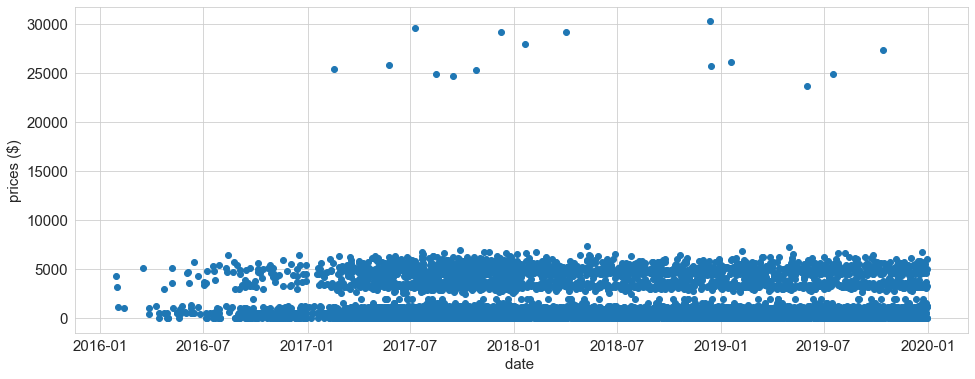

In [211]:
plt.subplots(figsize=(16,6))

plt.scatter(x,y)
plt.xlabel("date ",fontsize=15)
plt.ylabel('prices ($)',fontsize=15)
plt.tick_params(labelsize=15)
plt.show()


In [212]:
df3=df1.reset_index()['Close_Value']
df3

0       1255
1         45
2       1054
3       3180
4        517
        ... 
6256     590
6257    3284
6258     300
6259    3284
6260    1014
Name: Close_Value, Length: 6261, dtype: int64

In [213]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df3=scaler.fit_transform(np.array(df3).reshape(-1,1))

In [214]:
df3

array([[0.0402314 ],
       [0.0002314 ],
       [0.03358678],
       ...,
       [0.00866116],
       [0.10730579],
       [0.03226446]])

In [215]:
training_size=int(len(df3)*0.80)
test_size=len(df3)-training_size
train_data,test_data=df3[0:training_size,:],df3[training_size:len(df3),:1]

In [216]:
training_size,test_size

(5008, 1253)

In [42]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [217]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [218]:
print(X_train.shape), print(y_train.shape)

(4907, 100)
(4907,)


(None, None)

In [219]:
print(X_test.shape), print(ytest.shape)

(1152, 100)
(1152,)


(None, None)

In [220]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [221]:
import tensorflow as tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [222]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [223]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_4 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [224]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=20,batch_size=64,verbose=1)

Train on 4907 samples, validate on 1152 samples
Epoch 1/20
4907/4907 [==============================] - 186s 38ms/sample - loss: 0.0065 - val_loss: 0.0045
Epoch 2/20
4907/4907 [==============================] - 18s 4ms/sample - loss: 0.0063 - val_loss: 0.0044
Epoch 3/20
4907/4907 [==============================] - 18s 4ms/sample - loss: 0.0063 - val_loss: 0.0044
Epoch 4/20
4907/4907 [==============================] - 18s 4ms/sample - loss: 0.0063 - val_loss: 0.0045
Epoch 5/20
4907/4907 [==============================] - 18s 4ms/sample - loss: 0.0063 - val_loss: 0.0044
Epoch 6/20
4907/4907 [==============================] - 18s 4ms/sample - loss: 0.0063 - val_loss: 0.0044
Epoch 7/20
4907/4907 [==============================] - 18s 4ms/sample - loss: 0.0063 - val_loss: 0.0045
Epoch 8/20
4907/4907 [==============================] - 18s 4ms/sample - loss: 0.0063 - val_loss: 0.0044
Epoch 9/20
4907/4907 [==============================] - 18s 4ms/sample - loss: 0.0063 - val_loss: 0.0044
Epoch

In [225]:
import tensorflow as tf
tf.__version__

'2.0.0'

In [226]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [227]:
print(test_predict)  

[[0.07267758]
 [0.07258441]
 [0.07217227]
 ...
 [0.07417094]
 [0.07366442]
 [0.07290344]]


In [228]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [229]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

2178.032826908703

In [230]:
math.sqrt(mean_squared_error(ytest,test_predict))

2180.393196040556

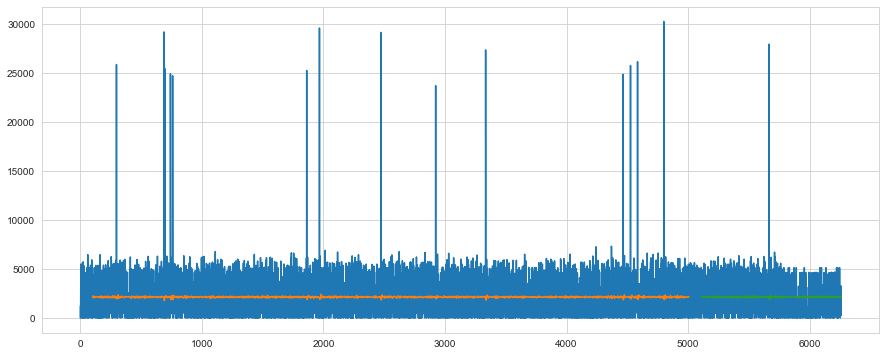

In [231]:
look_back=100
trainPredictPlot = numpy.empty_like(df3)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df3)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df3)-1, :] = test_predict
# plot baseline and predictions
plt.subplots(figsize=(15,6))
plt.plot(scaler.inverse_transform(df3))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()
#green is test data
# blue is total dataset

In [232]:
len(test_data),len(train_data)

(1253, 5008)

In [233]:
x_input=test_data[1153:].reshape(1,-1)
x_input.shape

(1, 100)

In [234]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [235]:
len(temp_input)

100

In [236]:
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<90):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.07078093]
101
1 day input [0.01484298 0.02859504 0.0172562  0.01861157 0.00039669 0.01500826
 0.0006281  0.00036364 0.0172562  0.02859504 0.03302479 0.01818182
 0.00026446 0.15391736 0.01649587 0.02859504 0.03358678 0.01824793
 0.02859504 0.15391736 0.01500826 0.02859504 0.00039669 0.01649587
 0.01861157 0.03947107 0.15302479 0.14796694 0.0648595  0.00036364
 0.03266116 0.01583471 0.10730579 0.00039669 0.04965289 0.00039669
 0.0006281  0.11090909 0.01583471 0.15391736 0.00036364 0.14796694
 0.01504132 0.03775207 0.15391736 0.01484298 0.01484298 0.00866116
 0.15391736 0.15302479 0.15302479 0.03180165 0.01649587 0.0648595
 0.01861157 0.03947107 0.03947107 0.00036364 0.01500826 0.16961983
 0.14796694 0.01649587 0.01818182 0.03180165 0.03302479 0.0006281
 0.0006281  0.01504132 0.16961983 0.00049587 0.01527273 0.00039669
 0.03358678 0.00039669 0.01728926 0.03775207 0.03266116 0.10386777
 0.03775207 0.01821488 0.03947107 0.01504132 0.03775207 0.11090909
 0.16961983 0.10730579 0.03302479 0

In [237]:
day_new=np.arange(1,101)
day_pred=np.arange(101,191)

In [238]:
import matplotlib.pyplot as plt
len(df3)

6261

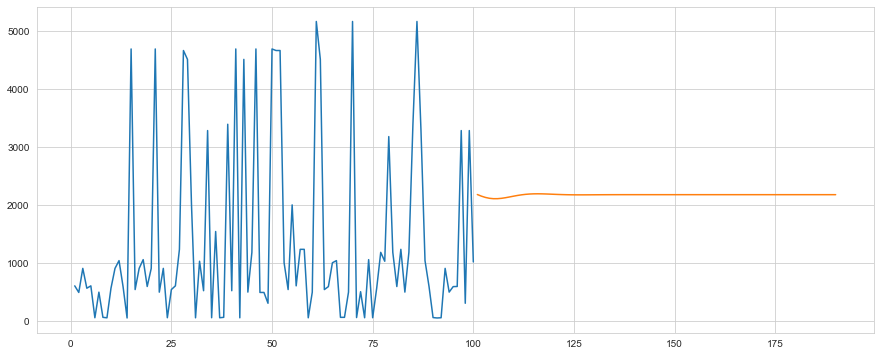

In [239]:
plt.subplots(figsize=(15,6))
plt.plot(day_new,scaler.inverse_transform(df3[6161:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))
##This is the prediction of prices for next 1 year......(360) days

# The Orange Line shows the prediction of future prices for next 90 days.

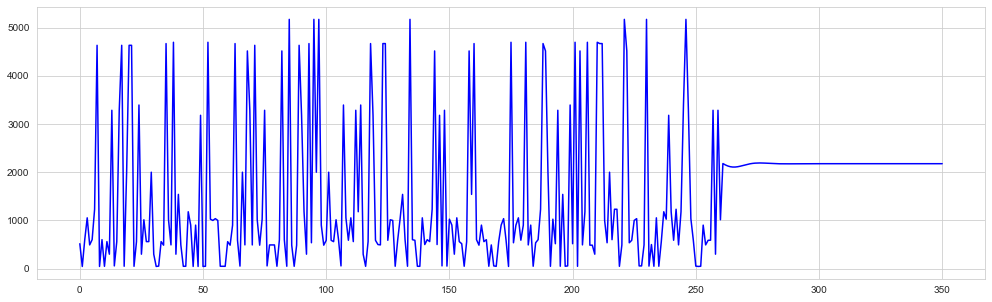

In [246]:
plt.subplots(figsize=(17,5))
df4=df3.tolist()
df4.extend(lst_output)
plt.plot(scaler.inverse_transform(df4[6000:]),color="blue")

## This final graph shows the future prediction of prices for next (90 days). since the time step is 100 ,  starting values are correct after some time it follows a particular trend..


##The accuracy of the model could also be increased by grouping the prices by month, quareter, years than predicting the prices using the same LSTM algorithm. In my case I have directly predicted the future prices daywise...

## same prediction of Close_values is done by using "FbProphet" python library to obtain the better accuracy.

In [50]:
from pandas import Series,DataFrame

In [51]:
df1

,Account,Opportunity_ID,Sales_Agent,SalesAgentEmailID,ContactEmailID,Deal_Stage,Product,Close_Value,Created Date,Close Date,DateDiff
0,Konex,3KR50X38,Corliss Cosme,corliss@piedpiper.com,delila@konex.com,Won,GTX Plus Basic,1255,2016-01-04,2016-05-24,141
1,Finjob,YFS5KLJJ,Rosalina Dieter,rosalina@piedpiper.com,belinda@finjob.com,Won,MG Special,45,2016-01-04,2016-11-02,303
2,Genco Pura Olive Oil Company,IBEUTCSW,James Ascencio,james@piedpiper.com,karole@gencopuraoliveoilcompany.com,Won,MG Advanced,1054,2016-01-06,2016-09-11,249
3,Stanredtax,2V848WZD,Lajuana Vencill,lajuana@piedpiper.com,candice@stanredtax.com,Won,MG Advanced,3180,2016-01-07,2016-01-31,24
4,Hatfan,PE84CX4O,Zane Levy,zane@piedpiper.com,tyron@hatfan.com,Won,GTX Basic,517,2016-01-08,2016-12-08,335
...,...,...,...,...,...,...,...,...,...,...,...
6256,Vehement Capital Partners,2BD1SDBX,Jonathan Berthelot,jonathan@piedpiper.com,lavonia@vehementcapitalpartners.com,Won,GTX Basic,590,2018-12-30,2019-07-22,204
6257,Hottechi,F1NWH30L,Marty Freudenburg,marty@piedpiper.com,juliette@hottechi.com,Won,MG Advanced,3284,2018-12-30,2019-05-26,147
6258,Umbrella Corporation,6KHIXTAD,Anna Snelling,anna@piedpiper.com,orpha@umbrellacorporation.com,Won,GTX Plus Pro,300,2018-12-31,2019-04-15,105
6259,Rundofase,BUOI3TBI,Gladys Colclough,gladys@piedpiper.com,crista@rundofase.com,Won,MG Special,3284,2018-12-31,2019-05-16,136


In [52]:
df2=pd.DataFrame()
df2[['ds','y']]= df1[['Close Date','Close_Value']]

In [53]:
df2.head(5)

,ds,y
0,2016-05-24,1255
1,2016-11-02,45
2,2016-09-11,1054
3,2016-01-31,3180
4,2016-12-08,517


In [54]:
import fbprophet
m = fbprophet.Prophet()
m.fit(df2)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [55]:
# Future 1 year Prediction

In [56]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
6621,2020-12-26
6622,2020-12-27
6623,2020-12-28
6624,2020-12-29
6625,2020-12-30


In [57]:
forecast= m.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
6621,2020-12-26,2101.882370,-643.887258,5198.494026,2056.449417,2150.051296,140.076722,140.076722,140.076722,93.992908,93.992908,93.992908,46.083813,46.083813,46.083813,0.0,0.0,0.0,2241.959092
6622,2020-12-27,2102.056131,-1052.670817,5291.792819,2056.395618,2150.528038,12.713909,12.713909,12.713909,-25.773760,-25.773760,-25.773760,38.487669,38.487669,38.487669,0.0,0.0,0.0,2114.770040
6623,2020-12-28,2102.229893,-867.039013,5097.040495,2056.369095,2150.860603,109.304688,109.304688,109.304688,76.756347,76.756347,76.756347,32.548341,32.548341,32.548341,0.0,0.0,0.0,2211.534581
6624,2020-12-29,2102.403654,-788.289661,4988.616946,2056.342572,2151.184826,-98.800684,-98.800684,-98.800684,-127.070544,-127.070544,-127.070544,28.269860,28.269860,28.269860,0.0,0.0,0.0,2003.602969
6625,2020-12-30,2102.577415,-863.757861,5106.272879,2056.316050,2151.583391,-8.199585,-8.199585,-8.199585,-33.797200,-33.797200,-33.797200,25.597614,25.597614,25.597614,0.0,0.0,0.0,2094.377830


In [58]:
df1.shape

(6261, 11)

In [59]:
forecast.shape

(6626, 19)

In [60]:
df1.describe()

,Close_Value,DateDiff
count,6261.000000,6261.000000
mean,2049.514774,312.709950
std,2320.145062,238.461095
min,38.000000,0.000000
25%,493.000000,118.000000
50%,1026.000000,247.000000
75%,3779.000000,481.000000
max,30288.000000,958.000000


In [61]:
forecast.describe()

,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
count,6626.000000,6626.000000,6626.000000,6626.000000,6626.000000,6626.000000,6626.000000,6626.000000,6626.000000,6626.000000,6626.000000,6626.000000,6626.000000,6626.000000,6626.0,6626.0,6626.0,6626.000000
mean,2054.084592,-910.684247,5010.937428,2053.084926,2055.164750,-3.411628,-3.411628,-3.411628,-1.022798,-1.022798,-1.022798,-2.388829,-2.388829,-2.388829,0.0,0.0,0.0,2050.672964
std,50.410002,190.124774,186.090545,50.073335,51.381487,136.437598,136.437598,136.437598,69.436098,69.436098,69.436098,118.569075,118.569075,118.569075,0.0,0.0,0.0,144.781813
min,1741.804172,-1663.874507,4353.977691,1741.804172,1741.804172,-391.873475,-391.873475,-391.873475,-127.070544,-127.070544,-127.070544,-264.802930,-264.802930,-264.802930,0.0,0.0,0.0,1517.948764
25%,2018.303185,-1039.682410,4885.602609,2018.303185,2018.303185,-98.982958,-98.982958,-98.982958,-33.797200,-33.797200,-33.797200,-88.382279,-88.382279,-88.382279,0.0,0.0,0.0,1950.558003
50%,2053.794536,-905.953056,5016.367293,2052.181466,2054.255413,6.240908,6.240908,6.240908,-14.058448,-14.058448,-14.058448,15.418511,15.418511,15.418511,0.0,0.0,0.0,2057.751157
75%,2098.960821,-780.363421,5142.164085,2098.499951,2101.034732,102.259754,102.259754,102.259754,76.756347,76.756347,76.756347,84.203522,84.203522,84.203522,0.0,0.0,0.0,2157.339912
max,2121.611661,-302.138754,5676.179444,2121.611661,2151.583391,327.628914,327.628914,327.628914,93.992908,93.992908,93.992908,233.702356,233.702356,233.702356,0.0,0.0,0.0,2401.387081


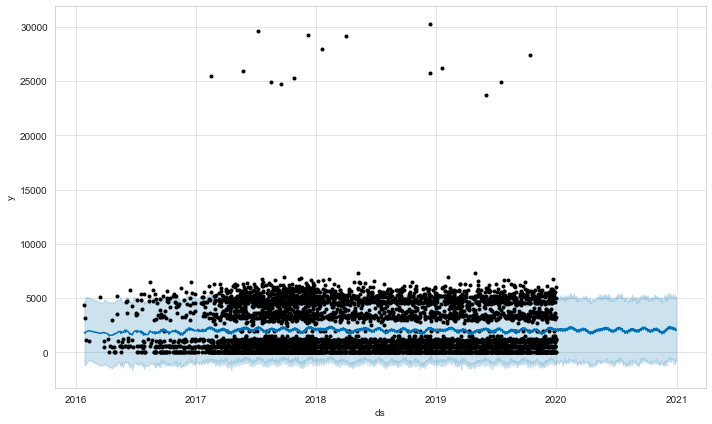

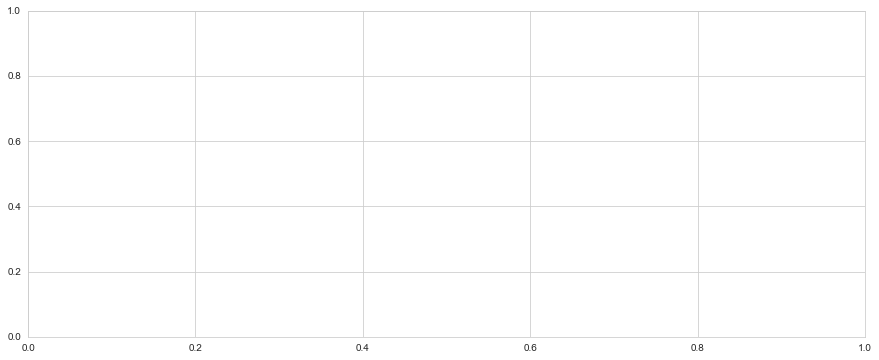

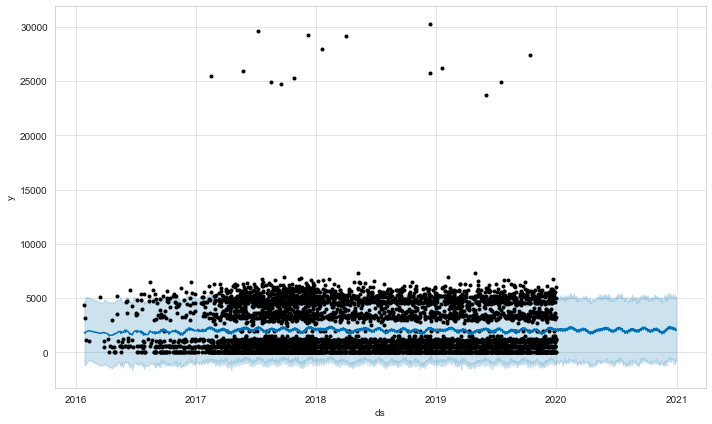

In [63]:
m.plot(forecast)

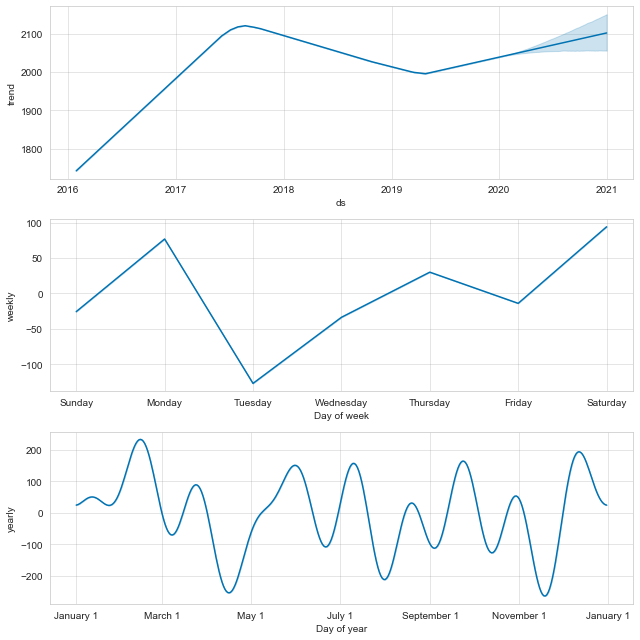

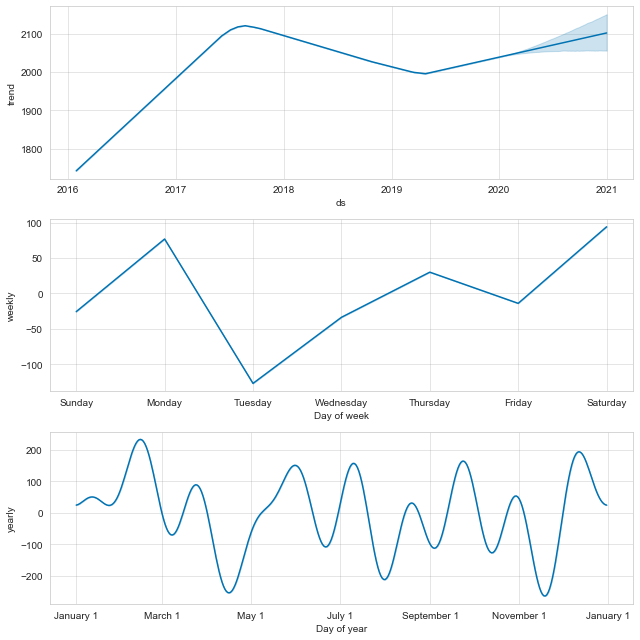

In [64]:
m.plot_components(forecast)